In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
np.mean(dataset)

C:\Users\ssingh\Desktop\DAXassignment\dsvenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ssingh\Desktop\DAXassignment\dsvenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [8]:
pd.Series(np.median(dataset.drop(["gender","ever_married","work_type","Residence_type","smoking_status"],axis=1),axis=0),index=["id","age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"])

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                        NaN
stroke                   0.000
dtype: float64

In [9]:
np.std(dataset)

C:\Users\ssingh\Desktop\DAXassignment\dsvenv\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


id                   21159.650905
age                     22.610434
hypertension             0.296578
heart_disease            0.226041
avg_glucose_level       45.279129
bmi                      7.853267
stroke                   0.215299
dtype: float64

### Here we can see that in this corr matrix the features age and bmi are correlated more 0.33 value also the target_class heart_disease is less correlated from feature bmi means any change in heart_disease has not much effect on bmi feature and vice versa and obviously id correlated less with heart_disease

### NOTE: Here BMI and age are highly correlated hence we can do some mathematical computations for less feature for our model

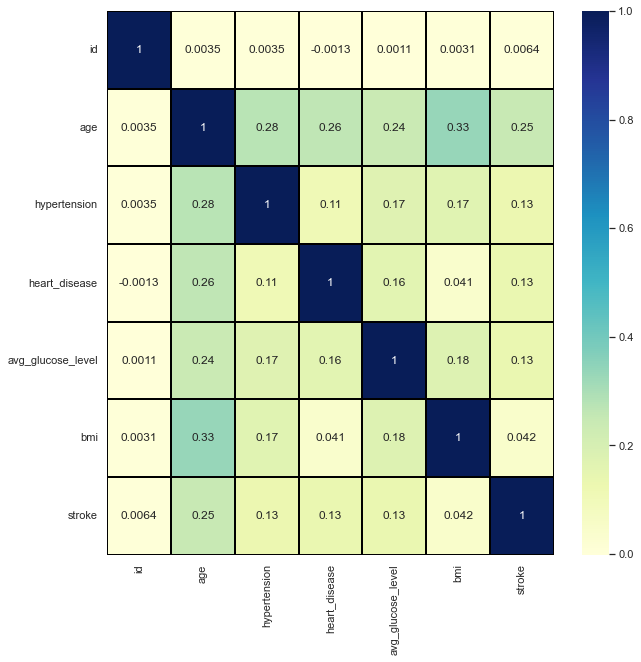

In [11]:
sns.heatmap(dataset.corr(),cmap="YlGnBu",linecolor="black",linewidths=2,annot=True)
sns.set(rc={'figure.figsize':(10,10)})

### Here in this countplot we can see that a individual who has never smoked has the highest count for not having heart_disease

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

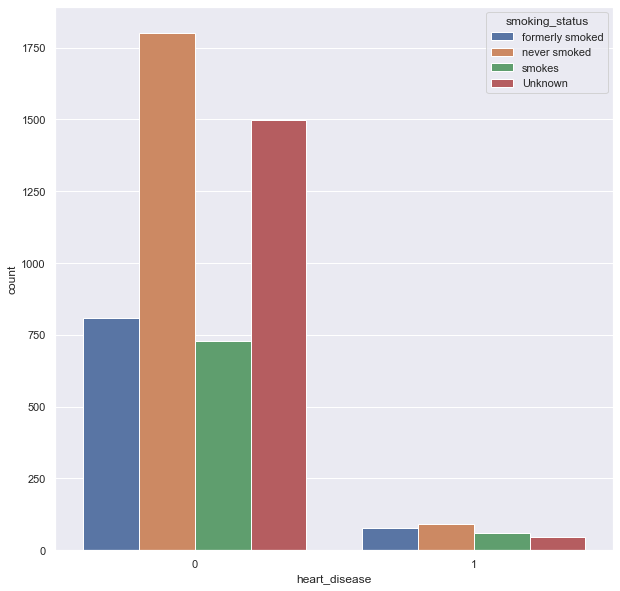

In [12]:
sns.countplot(x='heart_disease',hue="smoking_status",data=dataset)

In [13]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='heart_disease'>

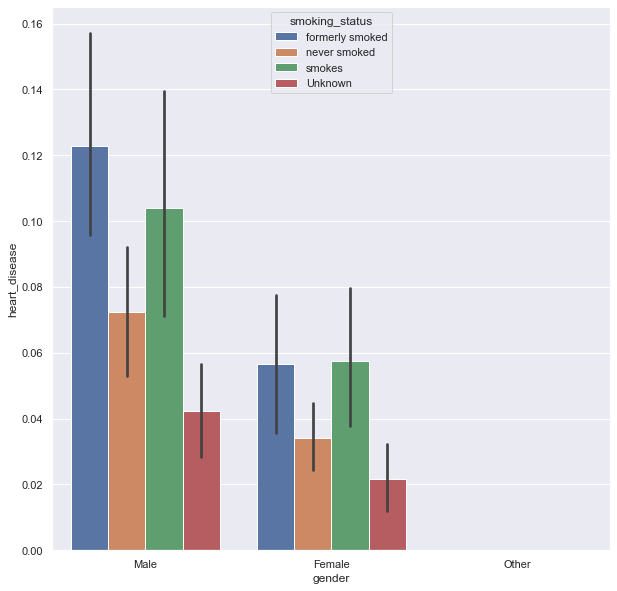

In [14]:
sns.barplot(x="gender",y="heart_disease",hue="smoking_status",data=dataset)

### In this violin Plot age is more varied across male with heart_disease around old age like around 75 years of age and the same can be said about the female and for both male and female that doesn't heart_disease is somewhat evenly varied

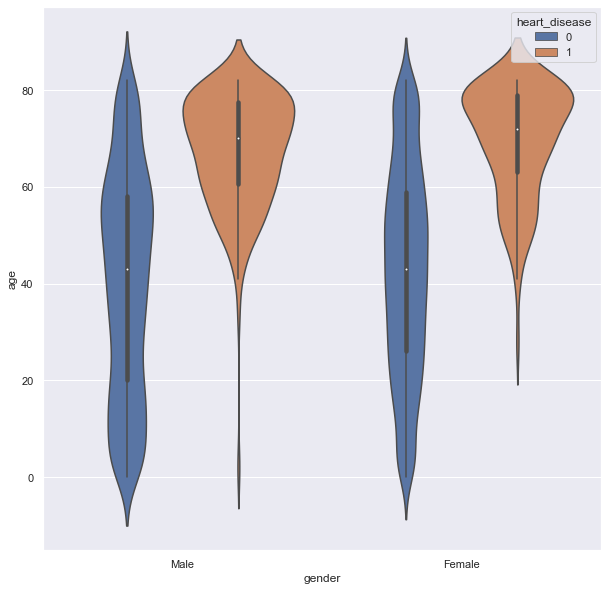

In [15]:
sns.violinplot(x="gender",y="age",hue="heart_disease",data=dataset[dataset["gender"]!="Other"])
sns.set(rc={'figure.figsize':(15,15)})

### In this swarmplot we can see that female with low avg_glucose_level are more in quantity than male with low avg_glucose_level

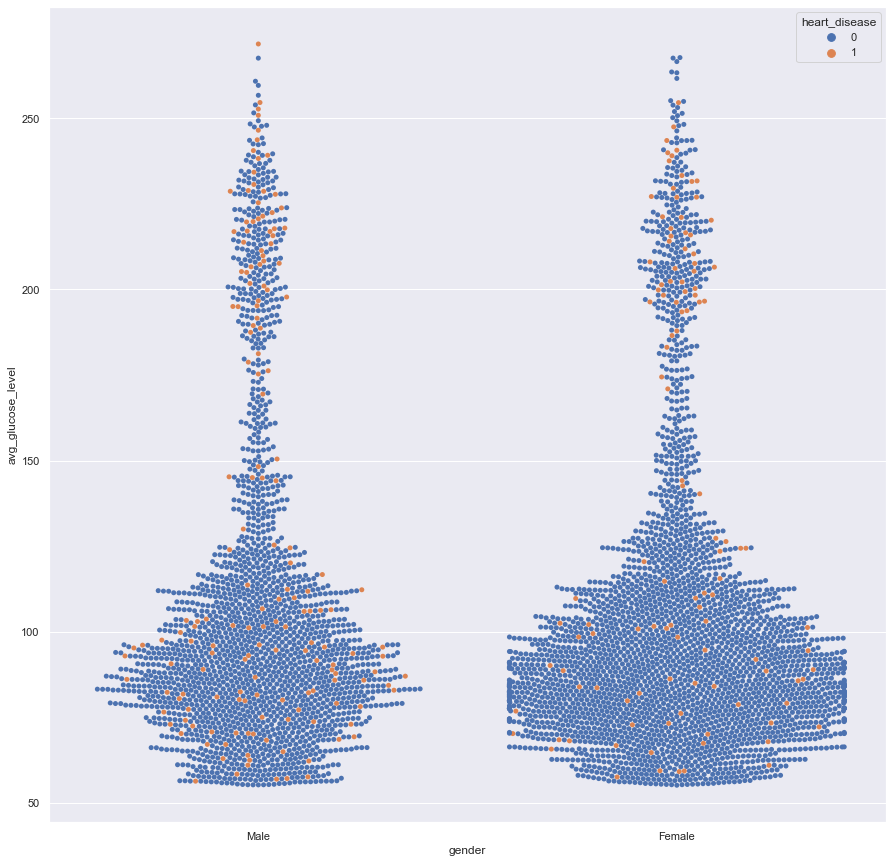

In [16]:
sns.swarmplot(x="gender",y="avg_glucose_level",hue="heart_disease",data=dataset[dataset["gender"]!="Other"])
sns.set(rc={'figure.figsize':(10,10)})

### In this kernel plot we can see that low glucose level can be found for age range of 0-85 and for high avg_glucose_level age range is 40-85 so we can combine these columns in such a way that it will provide some more insight

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

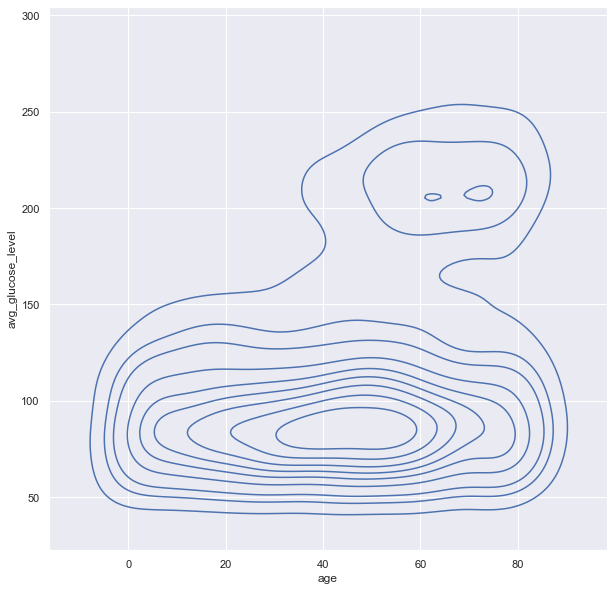

In [554]:
sns.kdeplot(x='age',y='avg_glucose_level',data=dataset)

In [555]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [556]:
dataset["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [17]:
dataset["stroke"]

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [560]:
cat_features = ["id","gender","ever_married","work_type","Residence_type","smoking_status"]

<AxesSubplot:xlabel='age', ylabel='bmi'>

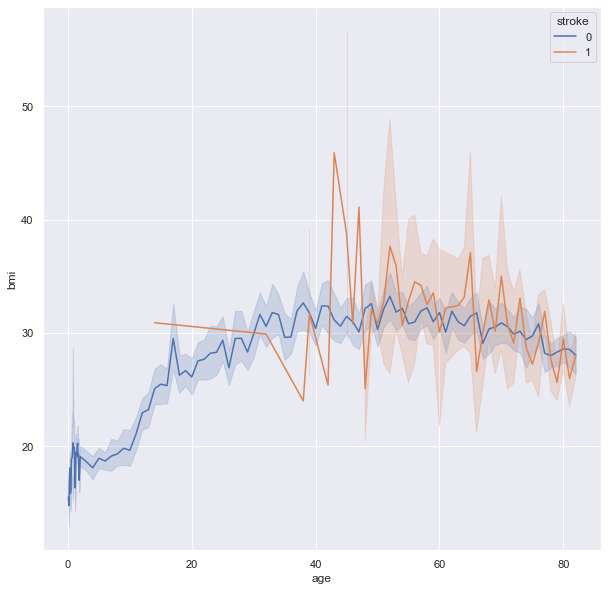

In [18]:
sns.lineplot(x="age",y="bmi",hue="stroke",data=dataset)

### Here we can visualize in this heatmap the values in which values bmi is Nan

<AxesSubplot:>

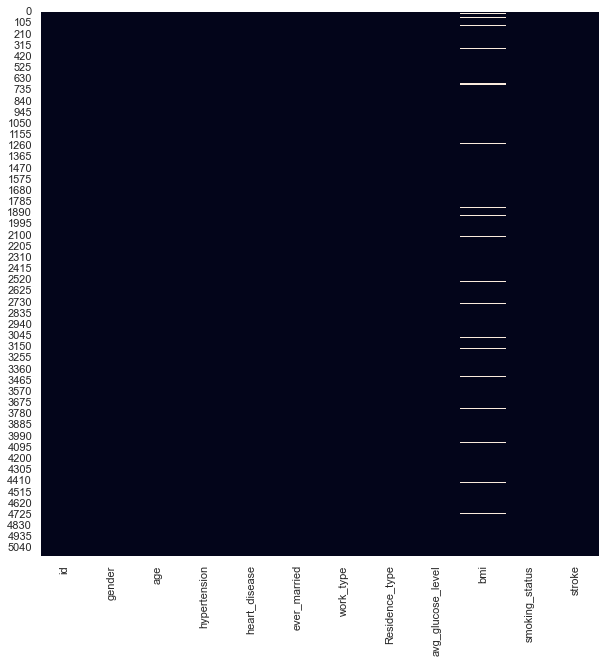

In [19]:
sns.heatmap(dataset.isnull(),cbar=False)

### From this boxplots we can see the outliers in bmi in range of 60-98 and outliers in avg glucose level which is more  above 45

<AxesSubplot:xlabel='bmi'>

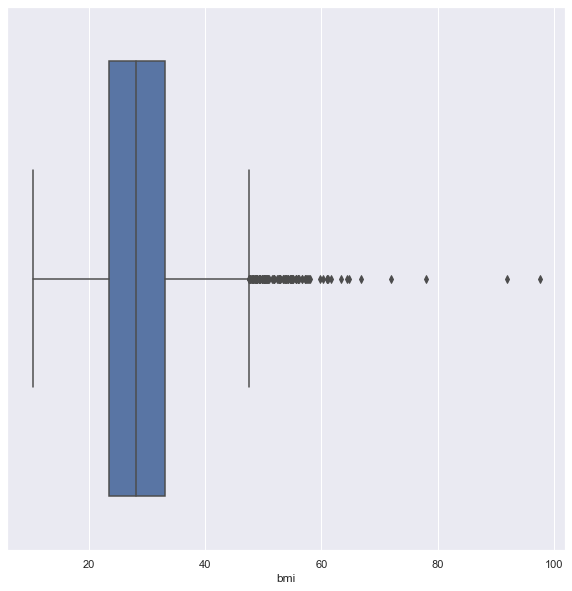

In [20]:
sns.boxplot(x=dataset["bmi"])

<AxesSubplot:xlabel='avg_glucose_level'>

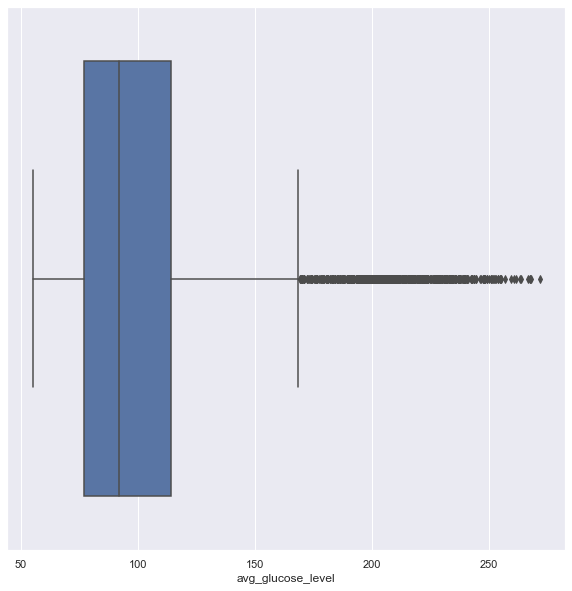

In [21]:
sns.boxplot(x=dataset["avg_glucose_level"])

### Percentage of data in which bmi which is null

In [22]:
perc_bmi = sum(dataset["bmi"].isnull())/len(dataset)*100

In [565]:
np.mean(dataset["bmi"])

28.893236911794666

In [23]:
perc_bmi

3.9334637964774952

### Imputating with median because data is Null

In [24]:
len(dataset.columns)

12

In [25]:
dataset.fillna(dataset.median(),inplace=True)

C:\Users\ssingh\AppData\Local\Temp\ipykernel_15860\19768.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.median(),inplace=True)


In [26]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Adding new feature bmi into age because i have seen in WHO website some relation of people with heart stroke having high bmi as well as high age

In [27]:
dataset["bmi_into_age"] = dataset["bmi"]*dataset["age"]

In [28]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_into_age
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2452.2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,1714.1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2600.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1685.6
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1896.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,2248.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,3240.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1071.0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1305.6


### The Interquartile Range is one of accurate ways of detecting outliers in our dataset we detect outliers for two features bmi and avg glucose level we found out that outliers of both features had some common rows in our dataset so instead of imputing we can delete this outliers in our dataset

In [29]:
def outliers(column):
    Q1 = np.percentile(np.sort(column),25)
    Q3 = np.percentile(np.sort(column),75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = np.where(column>upper)[0]
    lower_outliers = np.where(column<lower)[0]
    return np.concatenate([upper_outliers,lower_outliers])
    

In [30]:
outliers_bmi = outliers(dataset["bmi"])

In [32]:
len(outliers_bmi)

126

In [31]:
outliers_aglevel = outliers(dataset["avg_glucose_level"])

In [33]:
len(outliers_aglevel)

627

### The below list is the outliers of dataset common for both features avg_glucose_level and bmi so we can try to remove this outliers as it is common for both the features

In [45]:
dataset["bmi"] = np.log(dataset["bmi"])

In [46]:
dataset["bmi"]

0       3.600048
1       3.335770
2       3.481240
3       3.538057
4       3.178054
          ...   
5105    3.335770
5106    3.688879
5107    3.421000
5108    3.242592
5109    3.265759
Name: bmi, Length: 5110, dtype: float64

### By Imputing log values in bmi Column outliers in our dataset has been decreased and we need not remove all the outliers because outliers are important for our predictions

In [48]:
len(outliers(dataset["bmi"]))

88

<AxesSubplot:xlabel='bmi'>

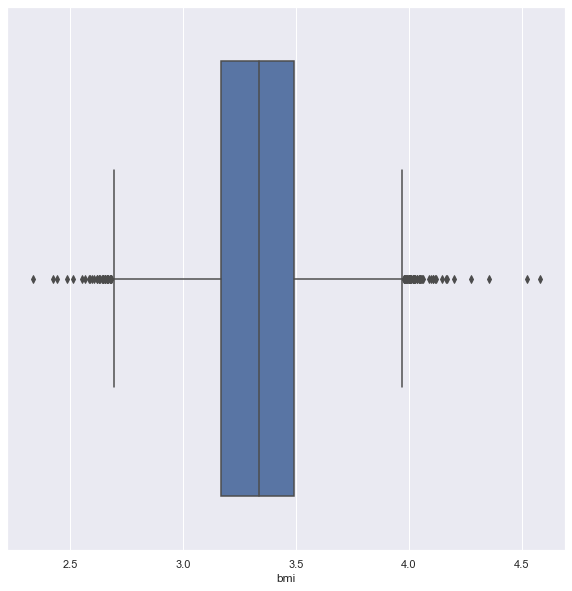

In [50]:
sns.boxplot(x = dataset["bmi"])

### Now you can see that outliers in our dataset has been decreased

In [596]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_into_age'],
      dtype='object')

In [597]:
dataset["avg_glucose_level"].iloc[new_outliers_aglevel]

0       91.68
1       91.68
3       91.68
4       91.68
5       91.68
        ...  
5061    91.68
5062    91.68
5063    91.68
5064    91.68
5076    91.68
Name: avg_glucose_level, Length: 597, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level'>

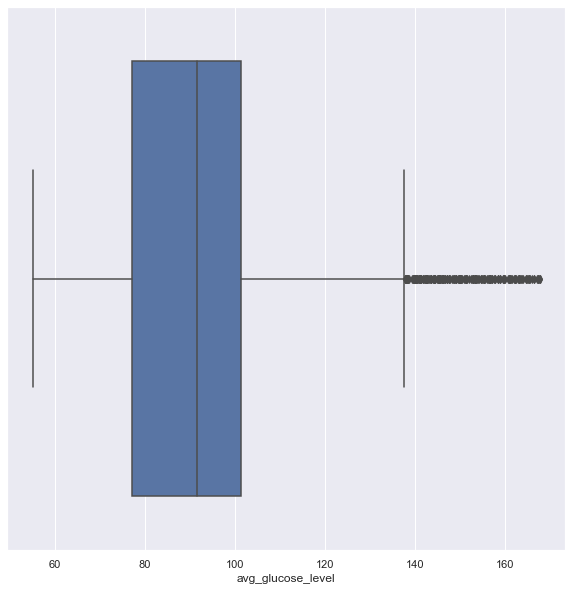

In [598]:
sns.boxplot(x=dataset["avg_glucose_level"])

### The Quantile vs Quantile plot is helpful for observing whether our dataset in this case scaled dataset follows normal/gaussian distribution or not. After plotting if the quantiles match and most of data points are on the straight 45 degree line means our dataset is normally distributed and the scaling is good. Here min max scaler is not suitable because our scaled data will be not normally distributed

In [51]:
import statsmodels.api as sm

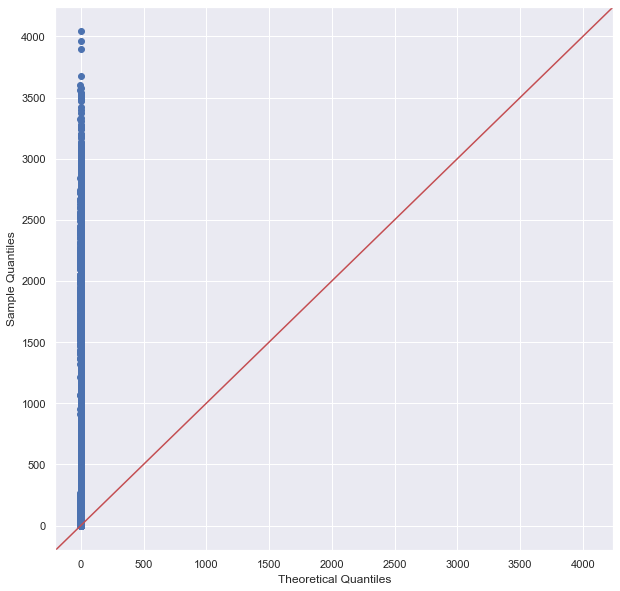

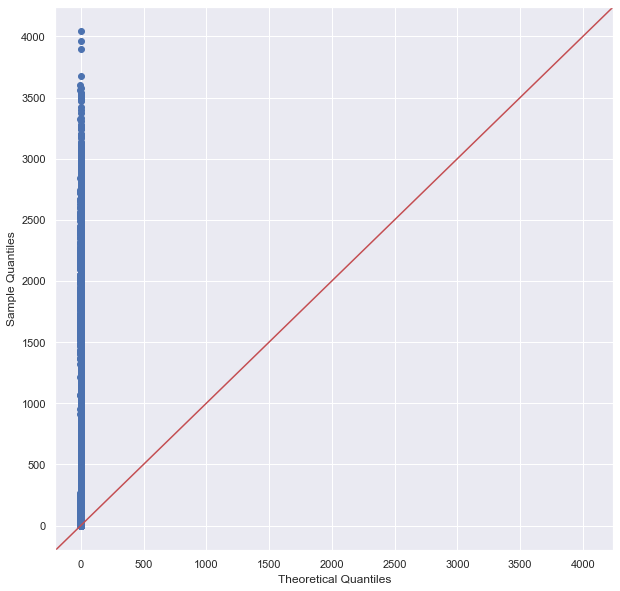

In [52]:
sm.qqplot(dataset.drop(['id', 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke'],axis=1),line='45')

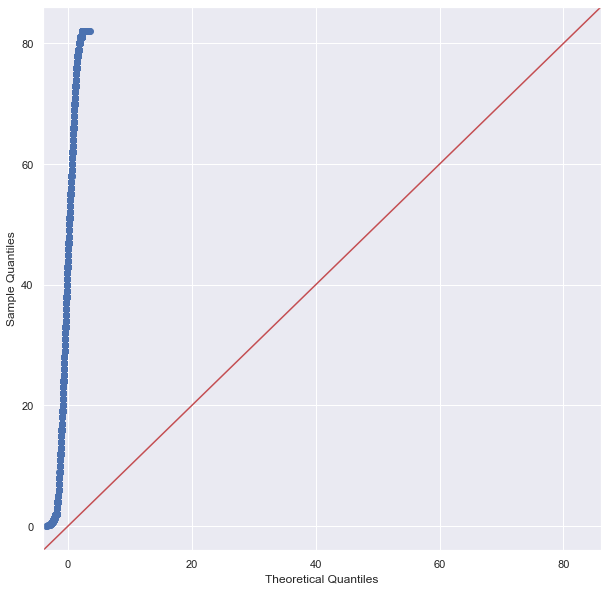

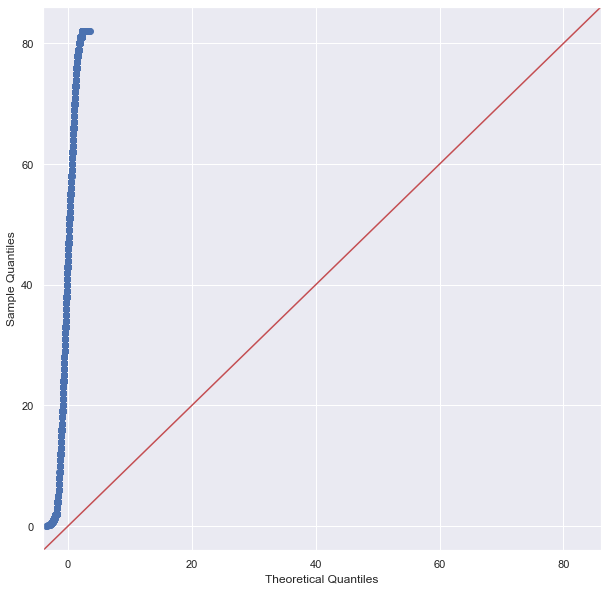

In [53]:
sm.qqplot(dataset["age"],line='45')

In [54]:
np.where(dataset.isna())

(array([], dtype=int64), array([], dtype=int64))

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler_min = MinMaxScaler()

In [58]:
new_data_m_max = pd.DataFrame(scaler_min.fit_transform(dataset[["avg_glucose_level","bmi","age"]].values),columns=["avg_glucose_level","bmi","age"],index=dataset.index)

In [59]:
np.where(dataset.isna())

(array([], dtype=int64), array([], dtype=int64))

In [60]:
scaler = StandardScaler()

In [61]:
dataset[["avg_glucose_level","age", "bmi","bmi_into_age"]] = pd.DataFrame(scaler.fit_transform(dataset[["avg_glucose_level","age", "bmi","bmi_into_age"]].values), columns=["avg_glucose_level","age","bmi","bmi_into_age"],index=dataset.index)

In [609]:
dataset = dataset.reset_index()

In [610]:
dataset.drop("index",axis=1,inplace=True)

In [62]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_into_age
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.044503,formerly smoked,1,1.506152
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,0.027170,never smoked,1,0.537899
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.587154,never smoked,1,1.700039
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.805868,smokes,1,0.500512
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.579952,never smoked,1,0.776519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,0.027170,never smoked,0,1.238279
5106,44873,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.386456,never smoked,0,2.539602
5107,19723,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,0.355262,never smoked,0,-0.305731
5108,37544,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-0.331513,formerly smoked,0,0.002021


In [63]:
dataset["bmi_into_age"]

0       1.506152
1       0.537899
2       1.700039
3       0.500512
4       0.776519
          ...   
5105    1.238279
5106    2.539602
5107   -0.305731
5108    0.002021
5109   -0.198425
Name: bmi_into_age, Length: 5110, dtype: float64

In [65]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_into_age
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.044503,formerly smoked,1,1.506152
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,0.027170,never smoked,1,0.537899
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.587154,never smoked,1,1.700039
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.805868,smokes,1,0.500512
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.579952,never smoked,1,0.776519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,0.027170,never smoked,0,1.238279
5106,44873,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.386456,never smoked,0,2.539602
5107,19723,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,0.355262,never smoked,0,-0.305731
5108,37544,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-0.331513,formerly smoked,0,0.002021


In [66]:
new_datas = dataset[["avg_glucose_level","age", "bmi","bmi_into_age"]]

### Here qqplot is used from standard scaler scaled dataset and the new scaled data is somewhat normally distributed

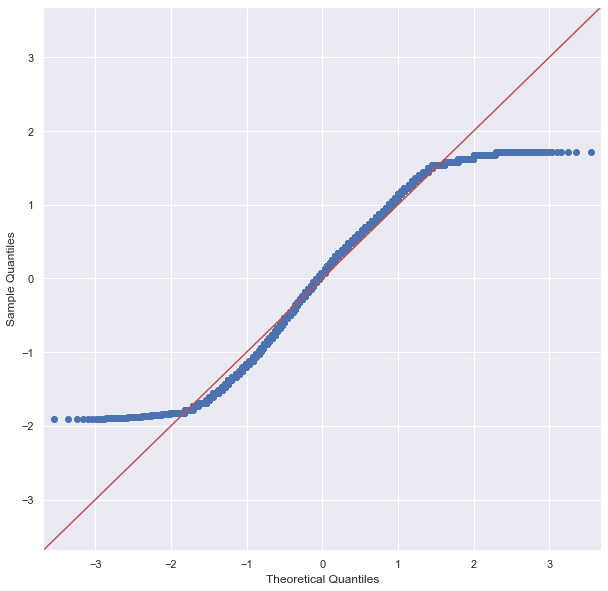

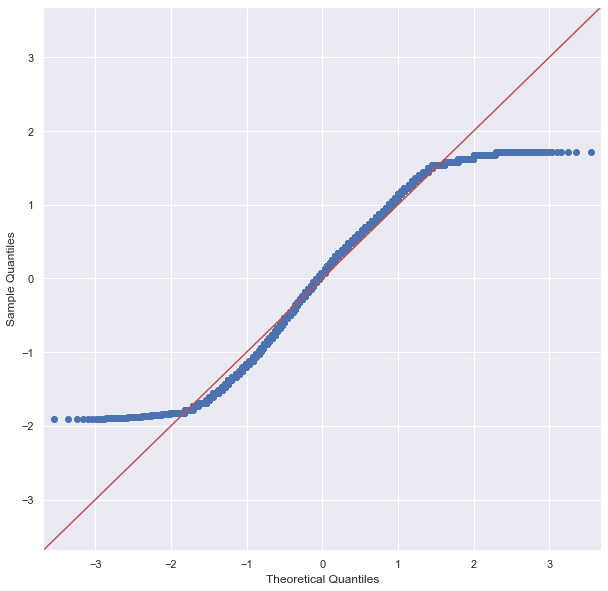

In [68]:
sm.qqplot(new_datas["age"],line='45')

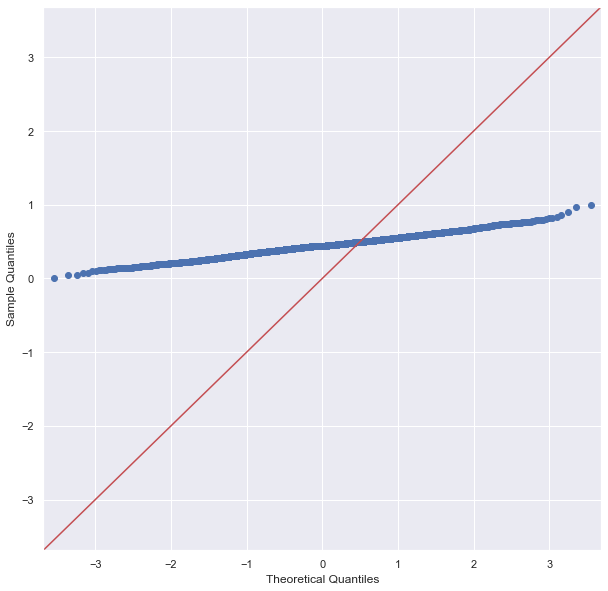

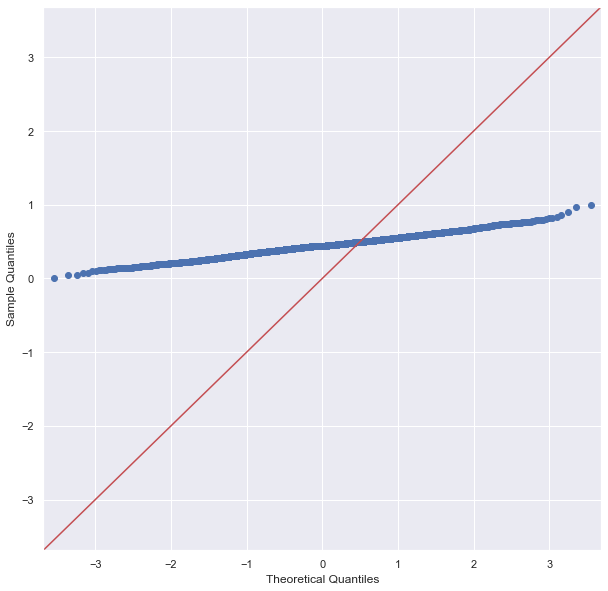

In [69]:
sm.qqplot(new_data_m_max["bmi"],line='45')

In [79]:
sum(new_datas["age"].isnull())

0

### One hot encoding is applied here instead of label encoding because here most of the categorical features are not ordinal ranking is not to be seen like work_type,gender,ever_married,etc.

In [82]:
encoded_dataset = pd.concat((dataset,pd.get_dummies(dataset[["work_type","gender","ever_married","Residence_type","smoking_status"]],drop_first=True)),axis=1)

In [83]:
encoded_dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.044503,...,1,0,0,1,0,1,1,1,0,0
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,0.027170,...,0,1,0,0,0,1,0,0,1,0
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.587154,...,1,0,0,1,0,1,0,0,1,0
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.805868,...,1,0,0,0,0,1,1,0,0,1
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.579952,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,0.027170,...,1,0,0,0,0,1,1,0,1,0
5106,44873,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.386456,...,0,1,0,0,0,1,1,0,1,0
5107,19723,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,0.355262,...,0,1,0,0,0,1,0,0,1,0
5108,37544,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-0.331513,...,1,0,0,1,0,1,0,1,0,0


In [84]:
dataset = encoded_dataset.drop(["work_type","gender","ever_married","Residence_type","smoking_status"],axis=1)

In [85]:
dataset.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'bmi_into_age', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [86]:
dataset["bmi_into_age"]

0       1.506152
1       0.537899
2       1.700039
3       0.500512
4       0.776519
          ...   
5105    1.238279
5106    2.539602
5107   -0.305731
5108    0.002021
5109   -0.198425
Name: bmi_into_age, Length: 5110, dtype: float64

In [87]:
pd.DataFrame([(dataset["hypertension"]==1)&(dataset["heart_disease"]==1)]).replace(True,1)

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
0,False,False,False,False,False,False,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Adding a new feature hypertension heart disease meaning feature value is 1 when both the hypertension and heart disease is 1 critical for our evaluation of stroke

In [88]:
((dataset["hypertension"]==1)&(dataset["heart_disease"]==1))

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [89]:
dataset["hypertension_heart_disease"] = ((dataset["hypertension"]==1)&(dataset["heart_disease"]==1))

In [90]:
from sklearn.feature_selection import SelectKBest,f_classif

In [91]:
selector = SelectKBest(score_func=f_classif)

In [92]:
dataset["hypertension_heart_disease"].replace(False,0,inplace=True)

In [93]:
dataset["hypertension_heart_disease"].replace(True,1,inplace=True)

In [97]:
dataset["bmi_into_age"]

0       1.506152
1       0.537899
2       1.700039
3       0.500512
4       0.776519
          ...   
5105    1.238279
5106    2.539602
5107   -0.305731
5108    0.002021
5109   -0.198425
Name: bmi_into_age, Length: 5110, dtype: float64

In [98]:
dataset.to_csv('AfterEngineeringFeatures_StrokesDataset.csv')